Student Name: Vijaykumar Maraviya

Student Number: 1006040320

In [ ]:
# not required on windows
# !apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
# not required on windows
# !pip install gym pyvirtualdisplay > /dev/null 2>&1

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
# not required on windows
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(400, 300))
# display.start()

Iterations that were run: 26


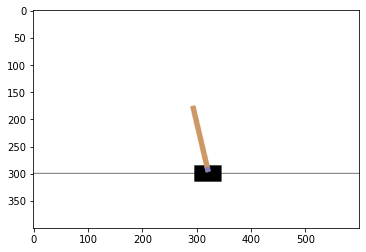

In [2]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
    action = env.action_space.sample()
    print("step i",i,"action=",action)
    obs, reward, done, info = env.step(action)
    print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
    screen = env.render(mode='rgb_array')

    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

### Exercise 1:

__Can you design a dynamic programming based policy for the agent as in assignment 1? If so, design it and demonstrate that it solves the cart pole problem.__

The dynamic programming approach requires the environment model; that is, it requires the information of the state transition probabilities. For the cart-pole environment in the openAI gym, we do not have the model.

Additionally, the observation space is continuous. Also, cart velocity and pole velocity at the tip can take any value, at least theoretically. Even if we discretize the state space, we will end up with a large number of states (assuming that our value table contains all the states) that the policy evaluation may take too long to be practically useful.  

### Exercise 2:

__Can you design a Monte Carlo based policy for the agent? What ingredients do you require? Explain the design flow, and execute it. Show that it works, or indicate why you can't proceed.__

We can design a Monte Carlo based policy for an RL agent to balance a cart-pole. However, a few caveats have been mentioned in lecture four and will be covered in the next lecture. Once it is covered, we should be able to use the Monte Carlo approach to create an optimal policy for the cart-pole environment. 

I have provided arguments for why the approach covered in the lecture so far is not sufficient, as follows:

Monte Carlo based approach does not require a model of the environment. Instead, it uses the action-value function Q to create a greedy policy during policy improvement. For a given policy, the Q is estimated during policy evaluation by calculating the average reward over an infinite number of episodes. The episodes are generated by interacting with the environment, real or simulated. The returns observed after the first visit to a state 's' and taking action 'a' over infinite episodes are averaged, which in limit converges to the true value of (s,a) pair. The requirement of experiencing infinite episodes is relaxed by truncating the policy evaluation after one episode. Yet, the algorithm still converges to the optimal policy. However, It is not guaranteed that all the (s,a) pairs will be visited during the episodes, especially with a deterministic policy. To deal with limitation in visiting all (s,a) pairs, two approaches are proposed:

1) Exploring starts: the episodes start in a state-action pair (s,a), and that every pair (s,a) has a non-zero probability of being selected as the start.

2) Stochastic policy: consider only stochastic policies with a non-zero probability of selecting all actions in each state. 

If either approach is used, it is guaranteed that all state-action pairs will be visited an infinite number of times in the limit of an infinite number of episodes.

The exploring start approach may not be relied upon, specifically when learning from a real environment. The cart-pole problem is an example where the 'exploring starts' approach is not useful because the pendulum starts in an upright position for each episode. Hence, to obtain policy using the Monte Carlo method, we will need to use the stochastic policy approach, which will be covered in the next lecture as mentioned in the 4th lecture. 